## Урок 7. Классификация с помощью KNN. Кластеризация K-means
___

Задачи:
1. К алгоритму kNN, реализованному на уроке, реализуйте добавление весов соседей по любому из показанных на уроке принципов.
2. Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделяем выборки на обучающую и тестовую

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    test_size=0.2,
                                                                    random_state=1,
                                                                    stratify=y)

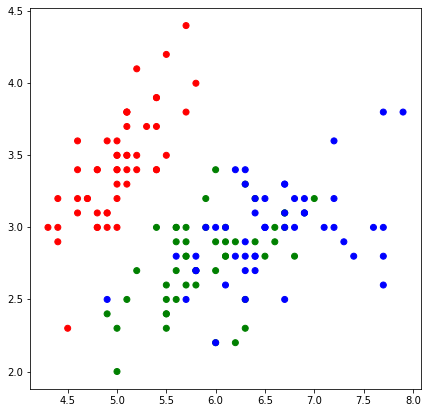

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Функция для подсчета Евклидовой метрики

In [5]:
def e_metrics(x1, x2):
    distance = np.sum(np.square(x1 - x2))
    return np.sqrt(distance)

### К алгоритму kNN, реализованному на уроке, реализуйте добавление весов соседей по любому из показанных на уроке принципов.
___

Функции расчета весовых коэффициентов

In [6]:
def w_coeff_1(q, d):
    return q ** d

def w_coeff_2(q, d):
    return 1 / (d + q)**(1 + q)

In [7]:
def knn(x_train, y_train, x_test, k, q = 1, wv=1):
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):

            distance = e_metrics(x, x_train[i])
            
            weight = 1
            # Расчет весового коэффициента, в случае задания варианта расчета.
            if wv == 1:
                weight = w_coeff_1(q, len(test_distances)+1)
            elif wv == 2:
                weight = w_coeff_1(q, distance)
            elif wv == 3:
                weight = w_coeff_2(q, distance)
            elif wv == 4:
                weight = w_coeff_2(q, len(test_distances)+1)

            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((weight*distance, y_train[i])) 
            # test_distances.append((distance, y_train[i])) 

        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Функция для расчета точности

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [9]:
k = 2
q = 0.1

y_pred = knn(X_train, y_train, X_test, k, q, 0)

print(y_test)
print(y_pred)

print(f'Точность алгоритма при k = {k}, q = {q} : {accuracy(y_pred, y_test):.3f}')

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]
[2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 2, 2]
Точность алгоритма при k = 2, q = 0.1 : 0.733


Лучшие параметры при wv = 0, и wv = 4.

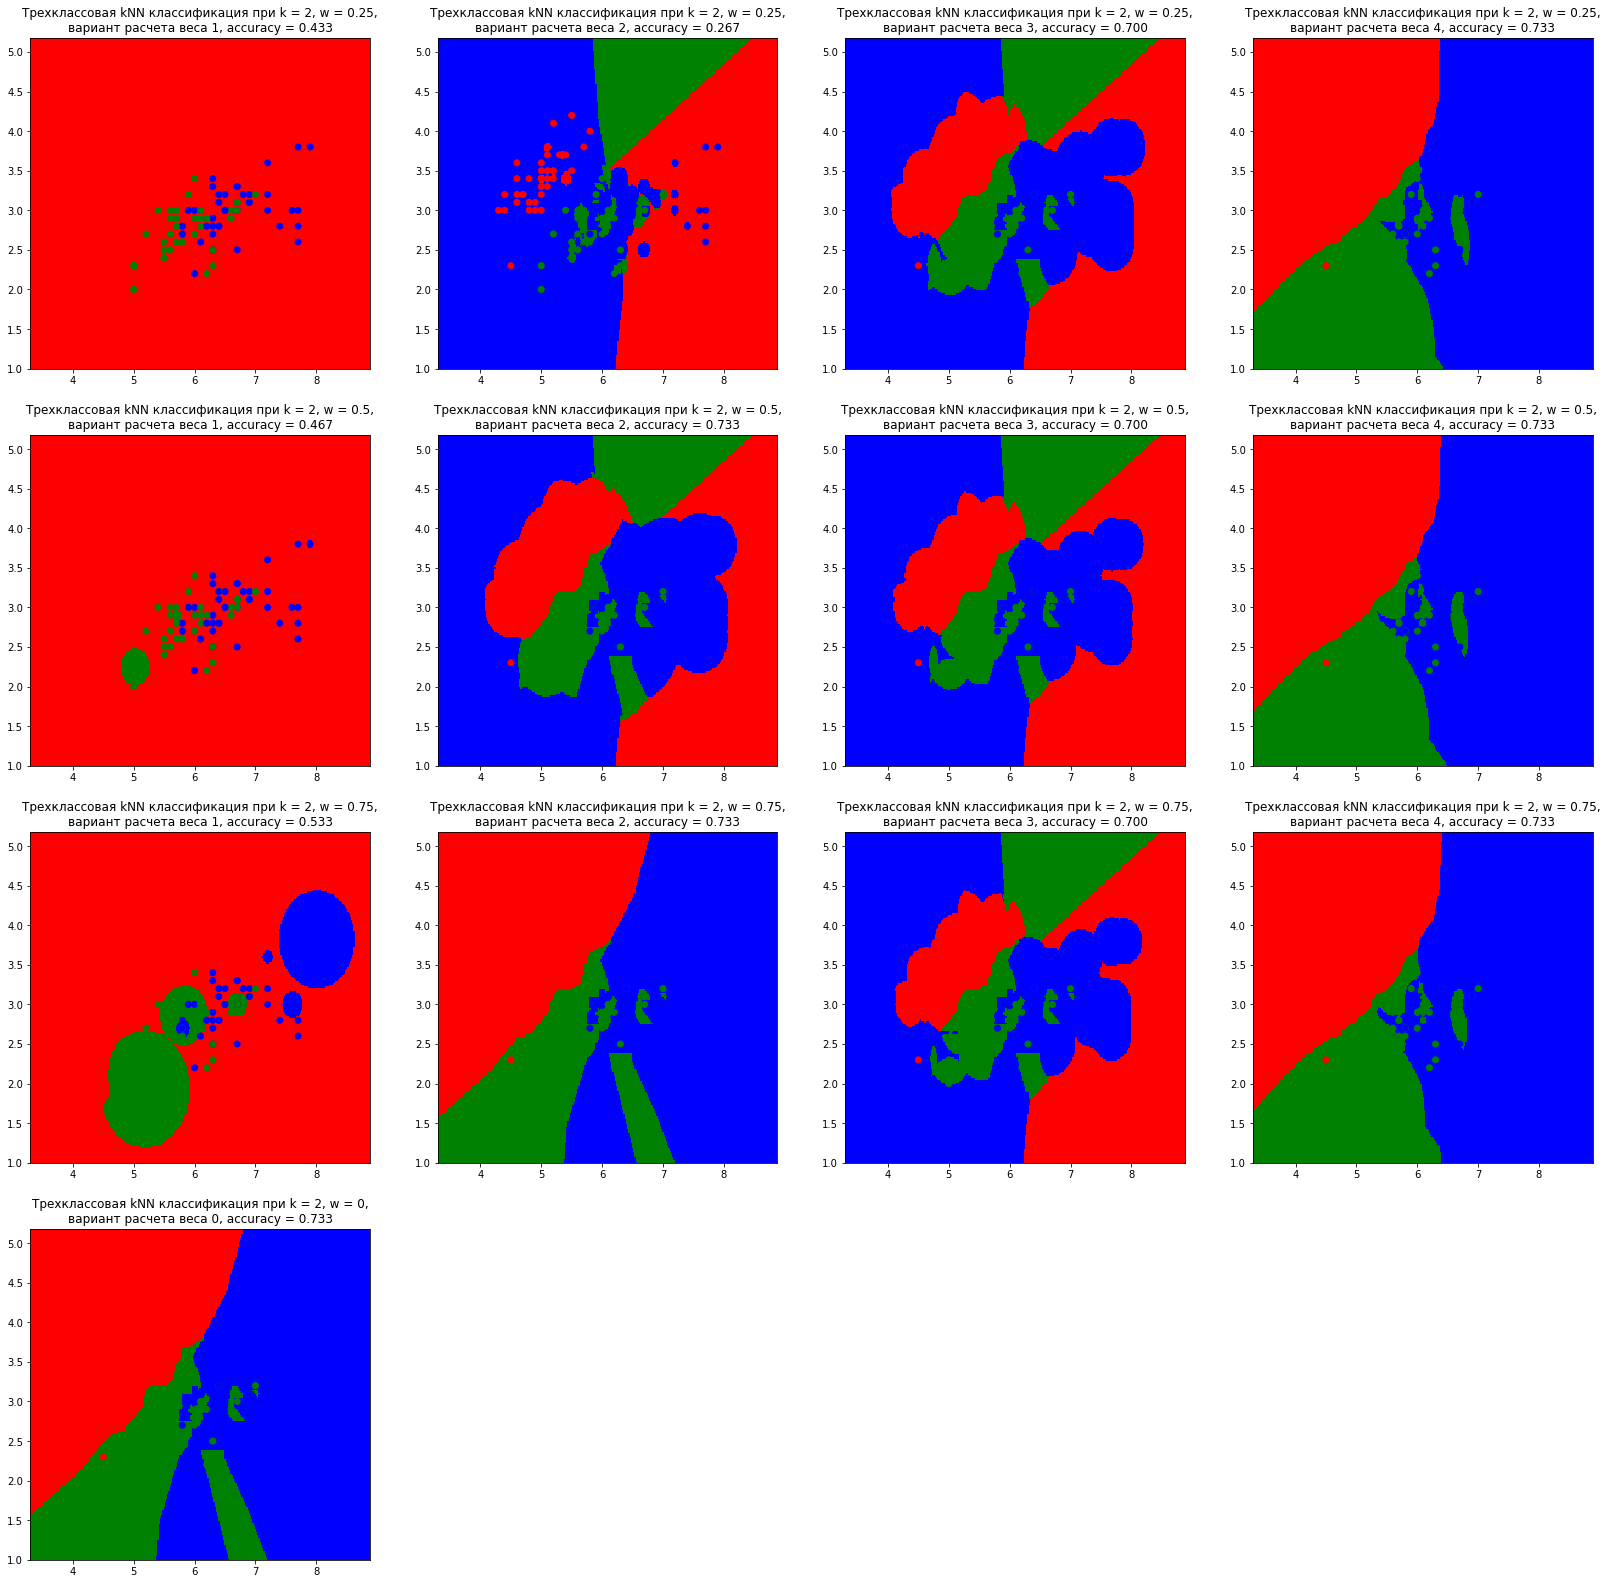

In [10]:
h = .02

# Расчет пределов графика
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

cmap_light = ListedColormap(['red', 'green','blue'])

plt.figure(figsize = (28, 28))

count = 0

k = 2

for q in [0.25, 0.5, 0.75]:
    for weights_version in [1, 2, 3, 4]:
    
        count += 1

        predict = knn(X_train, y_train, X_test, k, q, weights_version)
        accur = accuracy(predict, y_test)
        # print(f'Точность алгоритма при k = {k}, q = {w}\nвариант расчета веса {wv} : {accuracy(predict, y_test):.3f}')
    
        # Получим предсказания для всех точек
        Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q, weights_version)

        # Построим график
        Z = np.array(Z).reshape(xx.shape)

        plt.subplot(4,4,count)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Добавим на график обучающую выборку
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"Трехклассовая kNN классификация при k = {k}, w = {q},\nвариант расчета веса {weights_version}, accuracy = {accur:.3f}")

count += 1

predict = knn(X_train, y_train, X_test, k, 0, 0)
accur = accuracy(predict, y_test)

# Получим предсказания для всех точек
Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, 0, 0)

Z = np.array(Z).reshape(xx.shape)
plt.subplot(4,4,count)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Добавим на график обучающую выборку
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Трехклассовая kNN классификация при k = {k}, w = {0},\nвариант расчета веса {0}, accuracy = {accur:.3f}")

plt.show()

In [11]:
X, y = make_blobs(n_samples=500)

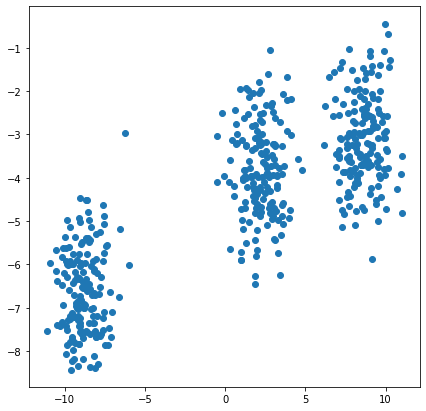

In [12]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [13]:
def kmeans(data, k, max_iterations, min_distance):
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):

        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}

        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break

    
    return old_centroids, classes

### Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.
___

In [14]:
def kmeans_quality(centroids, clusters):
    k=0
    quality=0
    for c in centroids:
        for x in clusters[k]:
            quality += e_metrics(x, c)**2
        k+=1
    return quality

In [15]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [16]:
max_iterations = 10
min_distance = 1e-4
k = 3

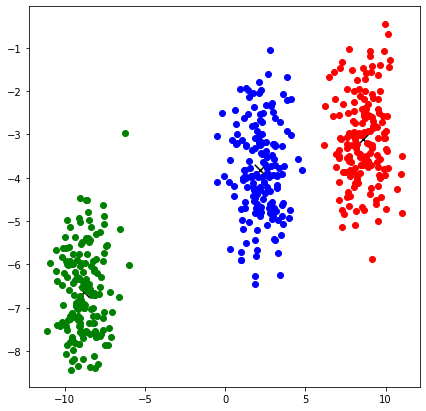

In [17]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)

In [18]:
kmeans_q=[]
for k in range(1,11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    kmeans_q.append(kmeans_quality(centroids, clusters))

In [19]:
print('среднее квадратичные внутриклассовые расстояния:\n', np.round(kmeans_q))


среднее квадратичные внутриклассовые расстояния:
 [27962.  4449.   998.   900.   828.   789.   775.   768.   656.   646.]


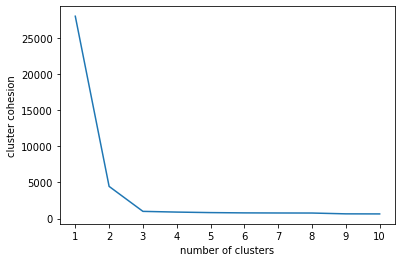

In [20]:
k=np.arange(10)
plt.xlabel('number of clusters')
plt.xticks(k+1)
plt.ylabel('cluster cohesion')
plt.plot(k+1,kmeans_q)

Увеличение кол-ва кластеров приводит к уменьшению среднеквадратичного внутриклассового расстояния, что логично, так как объектов становится больше, соответственно они распространяются шире по плоскости (пространству).